In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [11]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [15]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [19]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [21]:
X_train.isnull().mean()

Age       0.206461
Fare      0.043539
Family    0.000000
dtype: float64

In [23]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].mean()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].mean()

In [29]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)




In [31]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
251,29.0,NaN,2,29.0,29.0,32.050758,32.050758
294,24.0,7.8958,0,24.0,24.0,7.895800,7.895800
144,18.0,11.5000,0,18.0,18.0,11.500000,11.500000
83,28.0,47.1000,0,28.0,28.0,47.100000,47.100000
693,25.0,7.2250,0,25.0,25.0,7.225000,7.225000


In [33]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  222.36171933596935
Age Variance after median imputation:  176.3881993044821
Age Variance after mean imputation:  176.3881993044821
Original Fare variable variance:  2391.1615921268494
Fare Variance after median imputation:  2286.9056014715297
Fare Variance after mean imputation:  2286.9056014715297


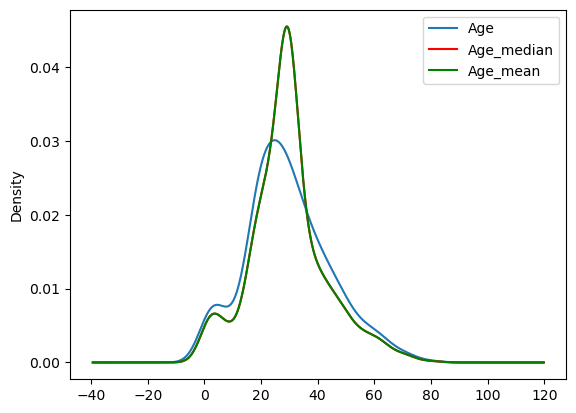

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

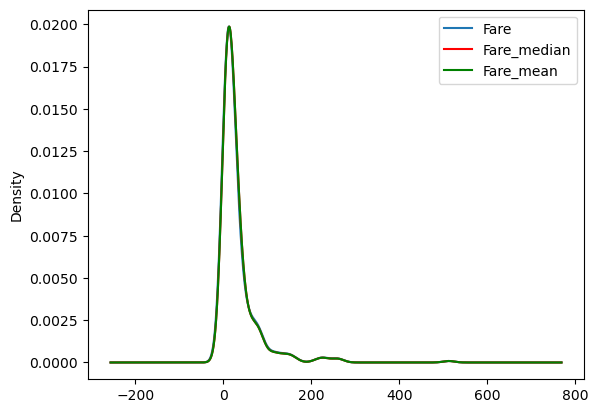

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [39]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,222.361719,93.220548,-6.451994,222.361719,222.361719,89.086389,89.086389
Fare,93.220548,2391.161592,16.804178,73.889299,73.889299,2391.161592,2391.161592
Family,-6.451994,16.804178,2.614066,-5.118038,-5.118038,16.071507,16.071507
Age_median,222.361719,73.889299,-5.118038,176.388199,176.388199,70.667684,70.667684
Age_mean,222.361719,73.889299,-5.118038,176.388199,176.388199,70.667684,70.667684
Fare_median,89.086389,2391.161592,16.071507,70.667684,70.667684,2286.905601,2286.905601
Fare_mean,89.086389,2391.161592,16.071507,70.667684,70.667684,2286.905601,2286.905601


In [41]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.119515,-0.293610,1.000000,1.000000,0.117506,0.117506
Fare,0.119515,1.000000,0.210985,0.113370,0.113370,1.000000,1.000000
Family,-0.293610,0.210985,1.000000,-0.238347,-0.238347,0.207862,0.207862
Age_median,1.000000,0.113370,-0.238347,1.000000,1.000000,0.111266,0.111266
Age_mean,1.000000,0.113370,-0.238347,1.000000,1.000000,0.111266,0.111266
Fare_median,0.117506,1.000000,0.207862,0.111266,0.111266,1.000000,1.000000
Fare_mean,0.117506,1.000000,0.207862,0.111266,0.111266,1.000000,1.000000


<Axes: >

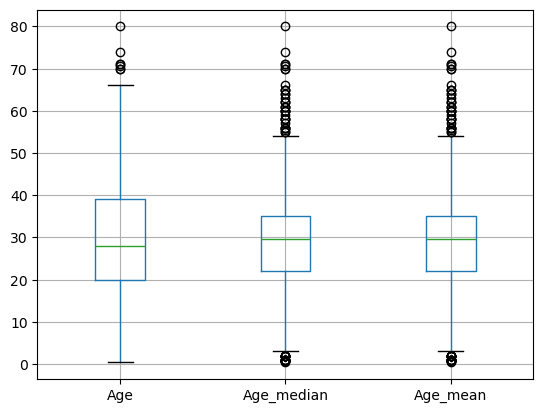

In [43]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

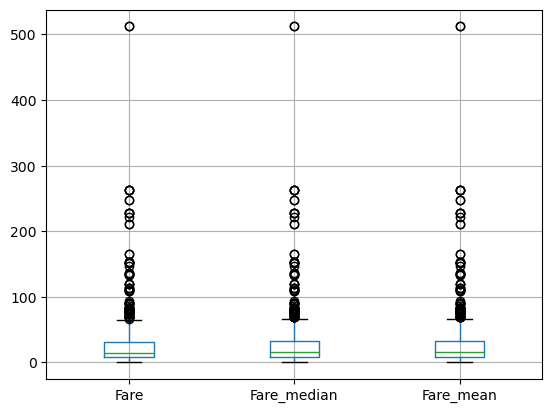

In [45]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

### Using sklearn

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [52]:
trf = ColumnTransformer([
    ('impute1',imputer1,['Age']),
    ('impute2',imputer2,['Fare'])
],remainder='passthrough')

In [54]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [60]:
trf.named_transformers_['impute1'].statistics_

array([28.75])

In [62]:
trf.named_transformers_['impute2'].statistics_

array([32.61759689])

In [64]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [66]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])